# PYSPECKIT 

## An extensible spectroscopic analysis toolkit for astronomy


### Documentation: http://pythonhosted.org/pyspeckit/
### source code: https://github.com/pyspeckit/pyspeckit (Way much more examples!)

# It only works for PYTHON 2.7! :(

### Install: 'pip install pyspeckit' it will install all the requirements.   

# Importing pyspeckit (and others)



In [2]:
%matplotlib notebook
%pylab
import numpy as np
#import pylab
import pyspeckit
#import pymc

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


### Generating the gaussian that we will fit with pyspeckit

In [3]:
xaxis = np.linspace(-50.0,150.0,500.)
#print xaxis
sigma = 10.
center = 50.
synth_data = 2.0*np.exp(-(xaxis-center)**2.0/(sigma**2.0 * 2.)) # Gaussian emission line

object of type <type 'float'> cannot be safely interpreted as an integer.


### Adding noise

In [4]:
stddev = 0.1
noise = np.random.randn(xaxis.size)*stddev
error = np.abs(stddev*np.random.randn(len(synth_data))) #noise

### Continuum emission

In [5]:
conti=0.03*xaxis+0.5 #continuum emission

### Total spectrum 

<IPython.core.display.Javascript object>


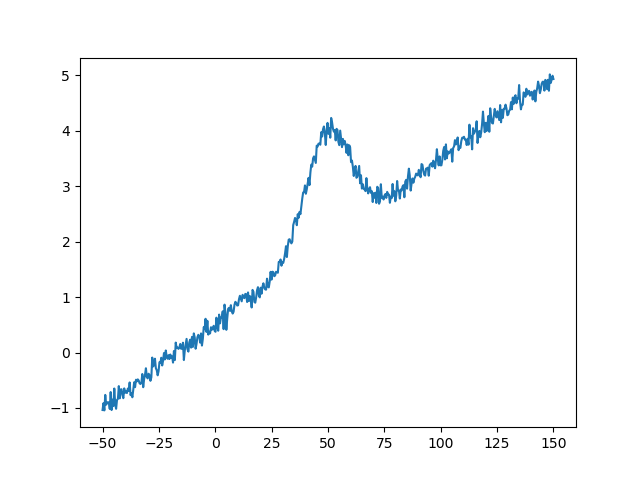

In [6]:
data = noise+synth_data+conti
pylab.figure()
pylab.plot(xaxis,data)

### Reading with Pyspeckit 

In [7]:
# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=data, error=error, xarr=xaxis,
                        xarrkwargs={'unit':'km/s'},
                        unit='erg/s/cm^2/AA')

# if you already have a simple fits file
#sp = pyspeckit.Spectrum('test.fits') 

#if yo have a plain text file with three columns xarr,data,err
#sp = pyspeckit.Spectrum('test.txt',xarrkwargs={'unit':'km/s'},
#                        unit='erg/s/cm^2/AA') 

## Fitting the continuum (or baseline)

<IPython.core.display.Javascript object>


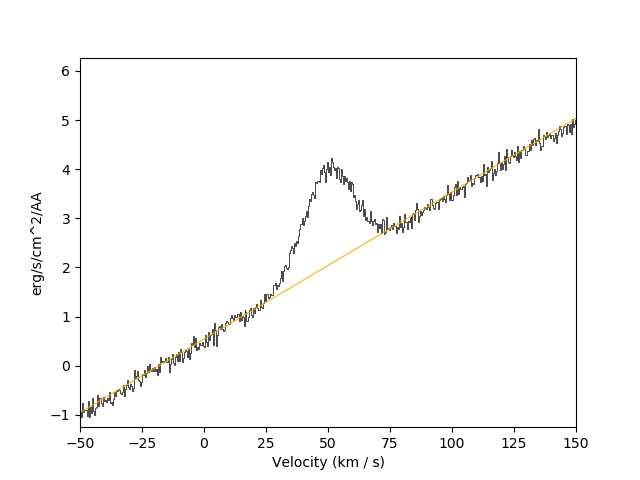

Iter       1    CHI-SQUARE =  3746095.588  DOF =  85
   P0 = 0  
   P1 = 0  
Iter       2    CHI-SQUARE =  3381970.299  DOF =  85
   P0 = 0.0005135130372  
   P1 = 0.02790754188  
Iter       3    CHI-SQUARE =  2727958.626  DOF =  85
   P0 = 0.001553728744  
   P1 = 0.06954393776  
Iter       4    CHI-SQUARE =  1692336.963  DOF =  85
   P0 = 0.003669768939  
   P1 = 0.08140124441  
Iter       5    CHI-SQUARE =  463685.9012  DOF =  85
   P0 = 0.007762364534  
   P1 = -0.2283458651  
Iter       6    CHI-SQUARE =  2832.976531  DOF =  85
   P0 = 0.01200330537  
   P1 = -0.9549356939  


In [8]:
exclude_cont=[-25,125] # exclude those regions defining emission lines
backup=sp.copy() # This is to make keep the original spectrum as it is and work with 'backup'
backup.plotter() # open the graphical interphase
backup.baseline.powerlaw=False
backup.baseline(xmin=-45,xmax=140,exclude=exclude_cont, subtract=False, highlight_fitregion=False,powerlaw=False,interactive=False,quiet=False,LoudDebug=False,annotate=False)

## Subtracting the continnum

In [9]:
sp.data=sp.data-backup.baseline.basespec

### lets plot it to see how it looks like 

<IPython.core.display.Javascript object>


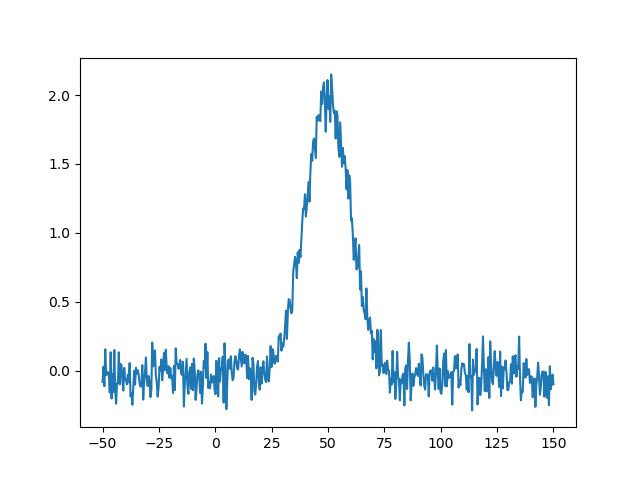

In [10]:
pylab.figure()
pylab.plot(sp.xarr,sp.data)

# Fit with automatic guesses

<IPython.core.display.Javascript object>


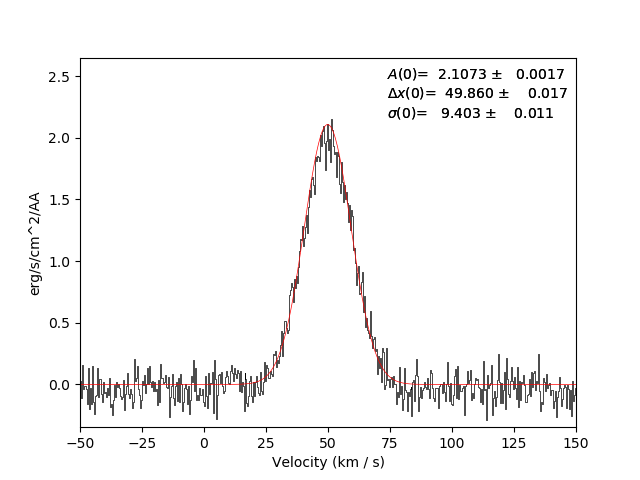

In [11]:
sp.plotter()
sp.specfit(fittype='gaussian')

In [ ]:
sp.specfit?

# Fit with input guesses
### The guesses initialize the fitter
### This approach uses the 0th (amplitude), 1st (central velocity), and 2nd (standard-deviation) moments

<IPython.core.display.Javascript object>


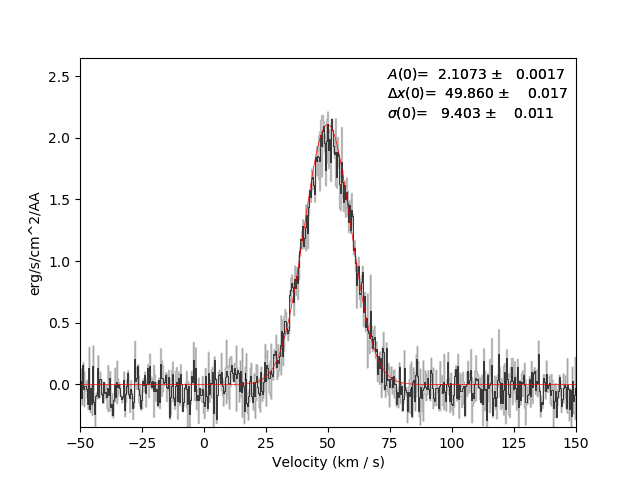

In [12]:
amplitude_guess = sp.data.max()
center_guess = (sp.data*xaxis).sum()/sp.data.sum()
width_guess = 18.0
guesses = [amplitude_guess, center_guess, width_guess]
sp.plotter()
sp.specfit(fittype='gaussian', guesses=guesses)
sp.plotter(errstyle='fill',autorefresh=True)
sp.specfit.plot_fit()

### Including limits and fixed parameters

<IPython.core.display.Javascript object>


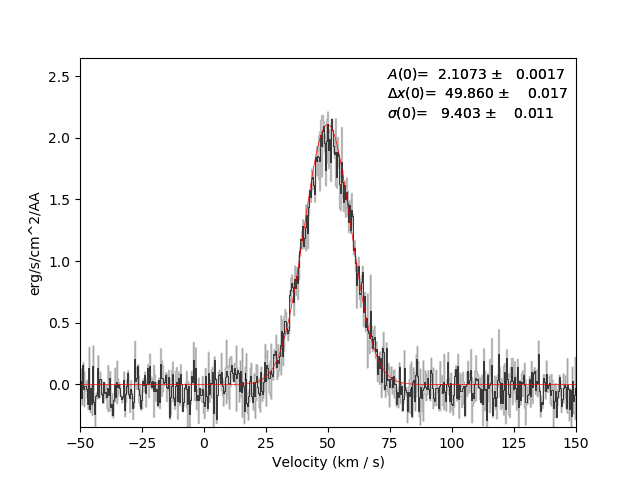

In [14]:
limits=[(0,1),(30,70),(2,30)] 
limited=[(True,False),(True,True),(True,True)]

#for absorption lines
#limits=[(-1,0),(30,70),(2,30)]
#limited=[(False,True),(True,True),(True,True)]

fixed = [False, False, False]
tied=["","",""]
amplitude_guess = sp.data.max()/2.0
center_guess = (sp.data*xaxis).sum()/sp.data.sum() + 3.0
width_guess = 25.0

guesses = [amplitude_guess, center_guess, width_guess]
sp.plotter(autorefresh=True)
sp.specfit(fittype='gaussian', guesses=guesses,limits=limits,limited=limited,fixed=fixed,tied=tied)
sp.plotter(errstyle='fill')
sp.specfit.plot_fit()


# Adding a second gaussian



<IPython.core.display.Javascript object>


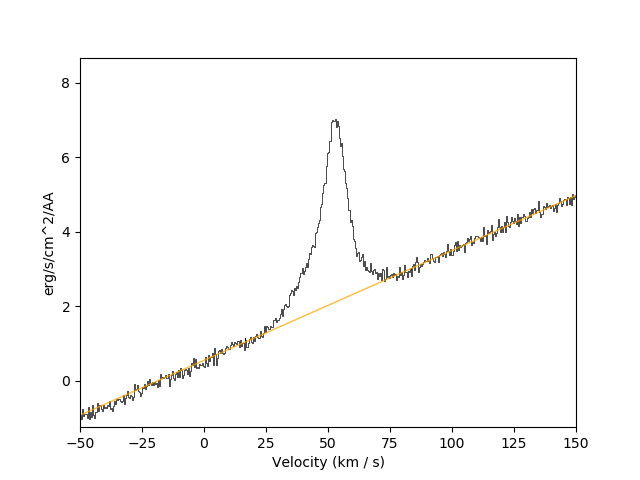

Iter       1    CHI-SQUARE =  7555756.902  DOF =  85
   P0 = 0  
   P1 = 0  
Iter       2    CHI-SQUARE =  6961865.992  DOF =  85
   P0 = 0.0003223552179  
   P1 = 0.0524912521  
Iter       3    CHI-SQUARE =  5968638.048  DOF =  85
   P0 = 0.0009123834887  
   P1 = 0.1423689526  
Iter       4    CHI-SQUARE =  4280870.492  DOF =  85
   P0 = 0.002129744245  
   P1 = 0.2961664322  
Iter       5    CHI-SQUARE =  1984482.941  DOF =  85
   P0 = 0.004758199874  
   P1 = 0.4171792262  
Iter       6    CHI-SQUARE =  211989.0891  DOF =  85
   P0 = 0.00959403446  
   P1 = -0.3165539621  
Iter       7    CHI-SQUARE =  4966.933875  DOF =  85
   P0 = 0.01181875052  
   P1 = -0.930700455  


In [15]:
sigma2=3.5
Amp=3
shift=3.0
center2=center+shift
synth_data2 = Amp*np.exp(-(xaxis-center2)**2/(sigma2**2 * 2.))
data2=noise+synth_data+conti+synth_data2
sp2 = pyspeckit.Spectrum(data=data2, error=error, xarr=xaxis,
                        xarrkwargs={'unit':'km/s'},
                        unit='erg/s/cm^2/AA')
exclude_cont=[-40,125]
backup1=sp2.copy()
backup1.plotter()
backup1.baseline.powelow=False
backup1.baseline(xmin=-50,xmax=150,exclude=exclude_cont, subtract=False, highlight_fitregion=False,powerlaw=False,interactive=False,quiet=False,LoudDebug=False,annotate=False)
sp2.data=sp2.data-backup1.baseline.basespec

## Tied parameters

<IPython.core.display.Javascript object>


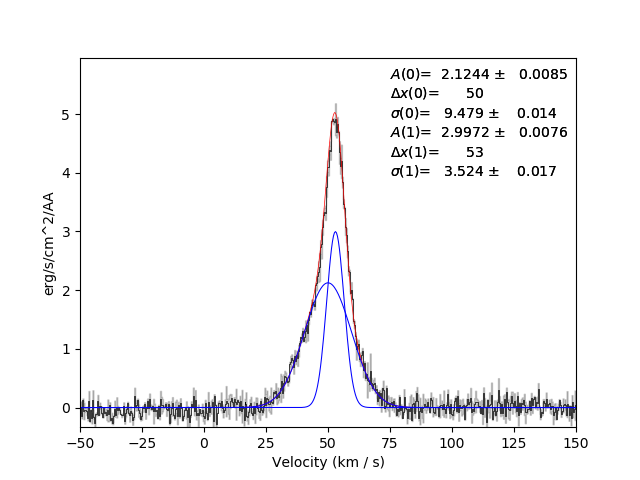

In [16]:
amplitude_guess1 = sp2.data.max()
center_guess1 = center_guess
width_guess1=4.0
guesses = [amplitude_guess, center_guess, width_guess,amplitude_guess1, center_guess1, width_guess1/2.0]
guesses = [1,50,6,1,63,3]
limits=[(0,1),(30,70),(5,30),(0,1),(30,70),(0,6)]
limited=[  (True,False),(True,True),(True,True),     (True,False),(True,True),(True,True)   ]
fixed = [False, True, False, False,False,False]
tied=["","","","","p[1]+%g"%(shift),""]
#tied=["","","","","",""]
sp2.plotter()
sp2.specfit(fittype='gaussian', guesses=guesses,limits=limits,limited=limited,fixed=fixed,tied=tied)
sp2.plotter(errstyle='fill')
sp2.specfit.plot_fit()
sp2.specfit.plot_components(add_baseline=False)

# Dealing with outputs

In [40]:
model=sp2.specfit.get_full_model() #full model with xaxis's lenght 
params=sp2.specfit.modelpars # fitted parameters 


{'amp': 2.1244293629956782e-17,
 'flux': 5.0474579210866281e-16,
 'fwhm': 22.320206151972059,
 'lum': 2.7126779472255619e+42,
 'modelerrs': [0.008507834166486726, 0.0, 0.013564173087974292],
 'modelpars': [2.1244293629956781, 50.0, 9.4785188358963133],
 'pos': 50.0}

In [ ]:
params_error=sp2.specfit.modelerrs # error in the parameters

# Conver to physical units for given  redshift (z) and flux normalization

sp2.measure(z = 1.00, fluxnorm = 1e-17) 
sp2.measurements.lines

In [ ]:
sp2.measurements.lines['unknown_1']

In [42]:
sp2.measurements.lines['unknown_1']['lum']

2.7126779472255619e+42

2.7126779472255619e+42

# Markov Chain monte carlo with PYMC

## Uniform priors

In [ ]:
MCuninformed = sp.specfit.get_pymc()
MCuninformed.sample(1000)
MCuninformed.stats()['AMPLITUDE0']

## Using gaussian priors around the fitted values 

In [ ]:
MCwithpriors = sp.specfit.get_pymc(use_fitted_values=True)
MCwithpriors.sample(100)
MCwithpriors.stats()['AMPLITUDE0']

In [ ]:
MCuninformed = sp.specfit.get_pymc

In [ ]:
MCuninformed = sp.specfit.get_pymc

AttributeError: 'Spectrum' object has no attribute 'measurements'